In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [102]:
# 데이터 생성
n = 100
X = np.linspace(0,10,n)
eps = np.random.normal(0,1**2,n)
b0 = -0.5
b1 = 0.07
b2 = 0.02
b3 = -0.05
# y = b0+b1*X+b2*X**2+b3*X**3+eps
y = np.exp(b0+b1*X+b2*X**2)+eps

#### 1. Simple Linear Regression

No handles with labels found to put in legend.


127.43007866758134
[ 1.78605763 -0.88333371  0.14996357]


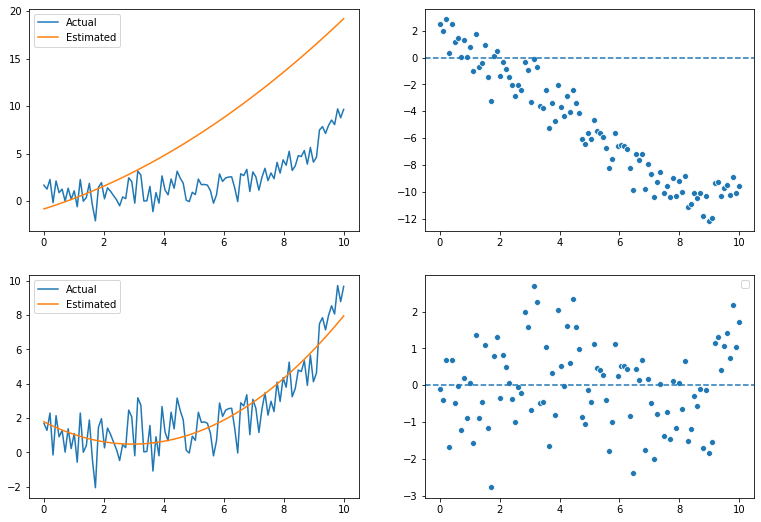

In [109]:
# 모수 추정 (초기값)
bhat0 = -0.8
bhat1 = 1.0
bhat2 = 0.1
yhat = bhat0+bhat1*X+bhat2*X**2
error = y-yhat

fig, axes = plt.subplots(2, 2, figsize=(13,9))
sns.lineplot(X, y, ax=axes[0, 0], label='Actual')
sns.lineplot(X, yhat, ax=axes[0, 0], label='Estimated')
axes[0, 1].axhline(0, ls='--')

sns.scatterplot(X, error, ax=axes[0, 1])

# 모수 추정 (최적화)
def cost_func(bhat):
    yhat = bhat[0]+bhat[1]*X+bhat[2]*X**2
    error = y-yhat
    cost = np.sum(error**2)
    return cost

bhat_init = np.array([-0.8, 1.0, -0.1])
res = minimize(cost_func, bhat_init, method='nelder-mead')
bhat_est = res.x
yhat_est = bhat_est[0]+bhat_est[1]*X+bhat_est[2]*X**2
error_est = y-yhat_est
print(cost_func(bhat_est))
print(bhat_est)

sns.lineplot(X, y, ax=axes[1, 0], label='Actual')
sns.lineplot(X, yhat_est, ax=axes[1, 0], label='Estimated')
sns.scatterplot(X, error_est, ax=axes[1, 1])
axes[1, 1].axhline(0, ls='--')

plt.legend()
plt.show()

#### 2. Ridge Regression

No handles with labels found to put in legend.


130.38680295698313
[ 1.64893171 -0.82554815  0.14503875]


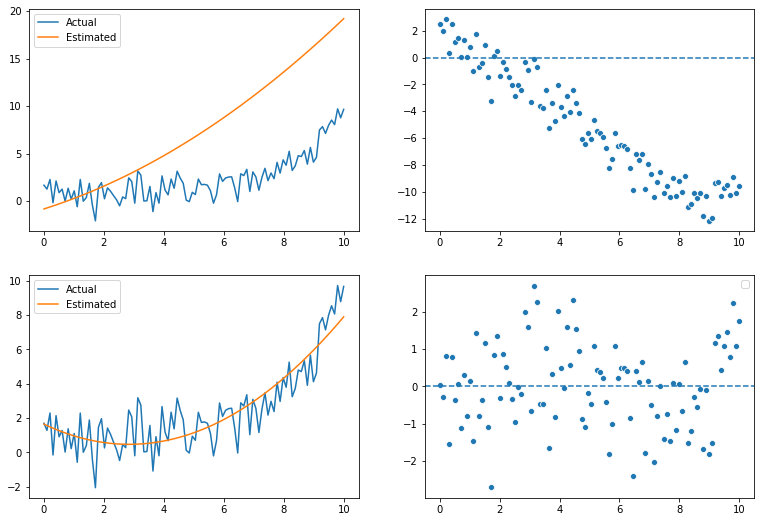

In [107]:
# 모수 추정 (초기값)
bhat0 = -0.8
bhat1 = 1.0
bhat2 = 0.1
yhat = bhat0+bhat1*X+bhat2*X**2
error = y-yhat

fig, axes = plt.subplots(2, 2, figsize=(13,9))
sns.lineplot(X, y, ax=axes[0, 0], label='Actual')
sns.lineplot(X, yhat, ax=axes[0, 0], label='Estimated')
axes[0, 1].axhline(0, ls='--')

sns.scatterplot(X, error, ax=axes[0, 1])

# 모수 추정 (최적화)
def cost_func_ridge(bhat, alpha):
    yhat = bhat[0]+bhat[1]*X+bhat[2]*X**2
    error = y-yhat
    cost = np.sum(error**2)+alpha*np.sum(bhat**2)
    return cost

bhat_init = np.array([-0.8, 1.0, -0.01])
alpha = 0.8
res = minimize(cost_func_ridge, bhat_init, args=alpha, method='nelder-mead',)
bhat_est = res.x
yhat_est = bhat_est[0]+bhat_est[1]*X+bhat_est[2]*X**2
error_est = y-yhat_est
print(cost_func_ridge(bhat_est, alpha))
print(bhat_est)

sns.lineplot(X, y, ax=axes[1, 0], label='Actual')
sns.lineplot(X, yhat_est, ax=axes[1, 0], label='Estimated')
sns.scatterplot(X, error_est, ax=axes[1, 1])
axes[1, 1].axhline(0, ls='--')

plt.legend()
plt.show()

#### 3. Lasso Regression

No handles with labels found to put in legend.


151.04448042549177
[ 1.16717046 -0.61017351  0.12617589]


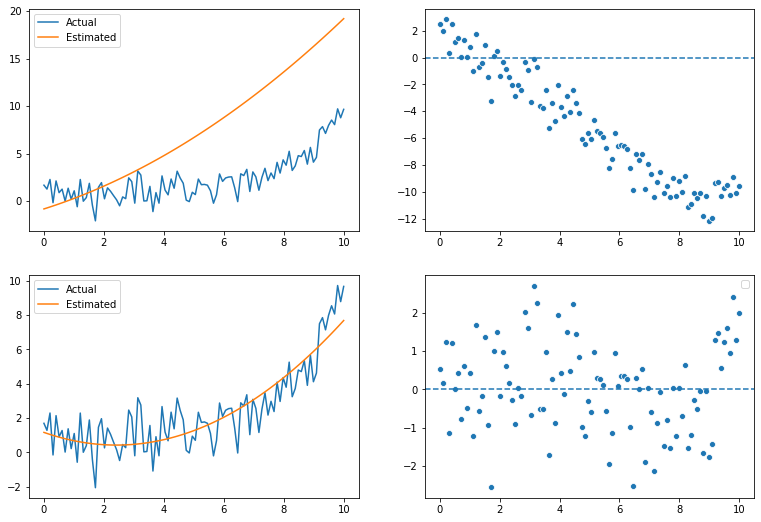

In [106]:
# 모수 추정 (초기값)
bhat0 = -0.8
bhat1 = 1.0
bhat2 = 0.1
yhat = bhat0+bhat1*X+bhat2*X**2
error = y-yhat

fig, axes = plt.subplots(2, 2, figsize=(13,9))
sns.lineplot(X, y, ax=axes[0, 0], label='Actual')
sns.lineplot(X, yhat, ax=axes[0, 0], label='Estimated')
axes[0, 1].axhline(0, ls='--')

sns.scatterplot(X, error, ax=axes[0, 1])

# 모수 추정 (최적화)
def cost_func_lasso(bhat, alpha):
    yhat = bhat[0]+bhat[1]*X+bhat[2]*X**2
    error = y-yhat
    cost = np.sum(error**2)+alpha*np.sum(np.abs(bhat))
    return cost

bhat_init = np.array([-0.8, 1.0, -0.01])
alpha = 10
res = minimize(cost_func_lasso, bhat_init, args=alpha, method='nelder-mead',)
bhat_est = res.x
yhat_est = bhat_est[0]+bhat_est[1]*X+bhat_est[2]*X**2
error_est = y-yhat_est
print(cost_func_ridge(bhat_est, alpha))
print(bhat_est)

sns.lineplot(X, y, ax=axes[1, 0], label='Actual')
sns.lineplot(X, yhat_est, ax=axes[1, 0], label='Estimated')
sns.scatterplot(X, error_est, ax=axes[1, 1])
axes[1, 1].axhline(0, ls='--')

plt.legend()
plt.show()